## 填充padding
为了使得网络结构能做的更深，padding是最有效的方法

In [4]:
import torch
from torch import nn

# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape) # torch.Size([1, 1, 8, 8])
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此按行看是增加了2行，按列看也增加了2列，公式中padding代2算(输出的高: 8-3+2+1=8 ，输出的宽:8-3+2+1=8)
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

输出尺寸计算公式：(n_h - k_h + padding + stride) / stride 向下取整，计算宽的同理，padding代入的值应该是按行来看总共填充了多少行，不是创建nn.Conv2d传入的超参数padding的值
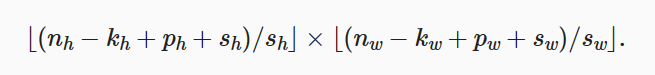

In [5]:
# 当卷积核的高度和宽度不同时，我们可以填充不同的高度和宽度，使输出和输入具有相同的高度和宽度
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

## 步幅stride
有时候为了高效计算或是缩减采样次数，卷积窗口可以跳过中间位置，每次滑动多个元素

In [6]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [7]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

填充和步幅可用于有效地调整输出的维度